In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize the data generator with augmentation options
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize the images to [0, 1]
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    'TERMARIC LEAF DATA/',
    target_size=(224, 224),  # Depending on the model architecture
    batch_size=32,
    class_mode='categorical',  # For multi-class classification
    subset="training"
)
validation_generator = datagen.flow_from_directory(
    'TERMARIC LEAF DATA/',
    target_size=(224, 224),  # Depending on the model architecture
    batch_size=32,
    class_mode='categorical',  # For multi-class classification
    subset="validation"
)


Found 134 images belonging to 3 classes.
Found 32 images belonging to 3 classes.


In [29]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.regularizers import l2

# Load MobileNet as the base model, without the top layer
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top for our specific task
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)  # Dropout layer for some regularization
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.1))(x)  # L2 regularization
predictions = Dense(3, activation='softmax')(x)  # Final prediction layer

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)


In [30]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history=model.fit(train_generator, validation_data=validation_generator, epochs=10)  # Adjust steps_per_epoch based on your dataset size


Epoch 1/10
5/5 [==============================] - 6s 896ms/step - loss: 96.3639 - accuracy: 0.5970 - val_loss: 81.4325 - val_accuracy: 0.9375
Epoch 2/10
5/5 [==============================] - 4s 902ms/step - loss: 72.3563 - accuracy: 0.8433 - val_loss: 62.9311 - val_accuracy: 0.8438
Epoch 3/10
5/5 [==============================] - 4s 909ms/step - loss: 55.5706 - accuracy: 0.7910 - val_loss: 47.7377 - val_accuracy: 0.9375
Epoch 4/10
5/5 [==============================] - 4s 767ms/step - loss: 43.6037 - accuracy: 0.9030 - val_loss: 35.9555 - val_accuracy: 0.7812
Epoch 5/10
5/5 [==============================] - 4s 729ms/step - loss: 31.2802 - accuracy: 0.8657 - val_loss: 26.2099 - val_accuracy: 0.8750
Epoch 6/10
5/5 [==============================] - 3s 829ms/step - loss: 22.5054 - accuracy: 0.9030 - val_loss: 18.8624 - val_accuracy: 0.9375
Epoch 7/10
5/5 [==============================] - 3s 680ms/step - loss: 17.0211 - accuracy: 0.9403 - val_loss: 13.7376 - val_accuracy: 0.8438
Epoch 

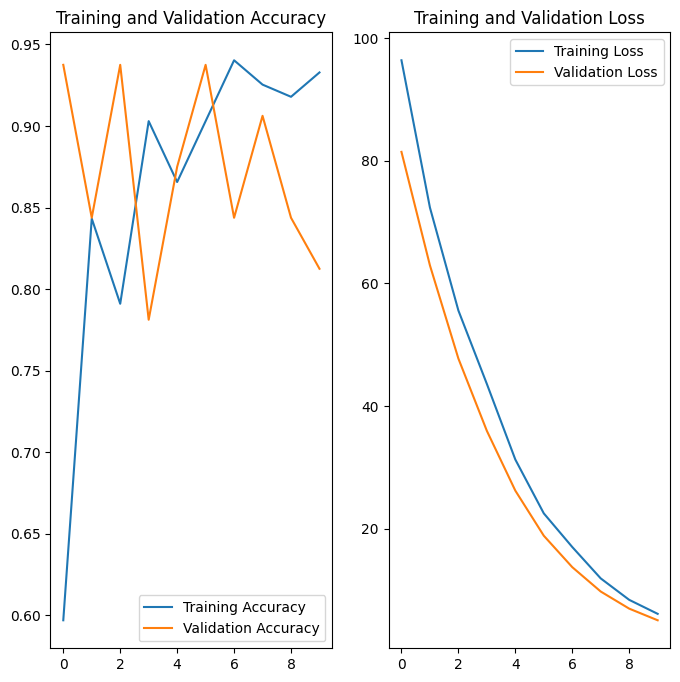

In [31]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by the model.fit() method
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Accuracy plot
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


1/1 [==============================] - 1s 1s/step


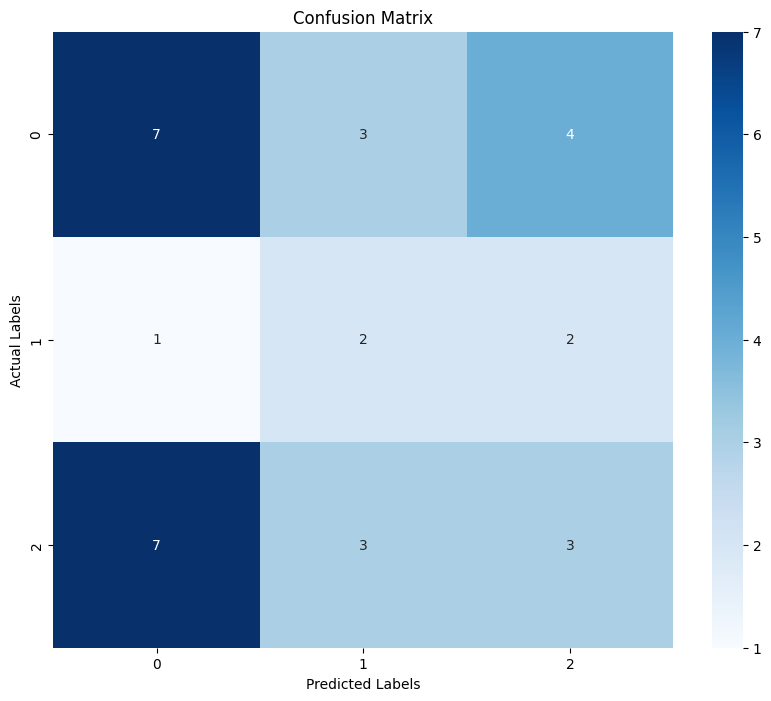

In [32]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns


predictions = model.predict(validation_generator, steps=np.ceil(validation_generator.samples/validation_generator.batch_size))
predicted_classes = np.argmax(predictions, axis=1)
true_classes = validation_generator.classes

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()


In [ ]:
model.save("mobilenet.h5")

In [35]:
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.regularizers import l2

# Load MobileNet as the base model, without the top layer
base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top for our specific task
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)  # Dropout layer for some regularization
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.1))(x)  # L2 regularization
predictions = Dense(3, activation='softmax')(x)  # Final prediction layer

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)


171446536/171446536 [==============================] - 21s 0us/step


In [36]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history=model.fit(train_generator, validation_data=validation_generator, epochs=10)  # Adjust steps_per_epoch based on your dataset size


Epoch 1/10
5/5 [==============================] - 24s 4s/step - loss: 122.3147 - accuracy: 0.3955 - val_loss: 97.0475 - val_accuracy: 0.4375
Epoch 2/10
5/5 [==============================] - 17s 4s/step - loss: 81.6103 - accuracy: 0.4627 - val_loss: 66.3655 - val_accuracy: 0.4062
Epoch 3/10
5/5 [==============================] - 16s 4s/step - loss: 54.7680 - accuracy: 0.4552 - val_loss: 43.8138 - val_accuracy: 0.2812
Epoch 4/10
5/5 [==============================] - 17s 3s/step - loss: 37.0055 - accuracy: 0.3806 - val_loss: 27.9619 - val_accuracy: 0.4062
Epoch 5/10
5/5 [==============================] - 15s 3s/step - loss: 24.1820 - accuracy: 0.5299 - val_loss: 17.3940 - val_accuracy: 0.4688
Epoch 6/10
5/5 [==============================] - 14s 3s/step - loss: 13.9966 - accuracy: 0.3731 - val_loss: 10.6520 - val_accuracy: 0.4375
Epoch 7/10
5/5 [==============================] - 15s 4s/step - loss: 8.6551 - accuracy: 0.4254 - val_loss: 6.6507 - val_accuracy: 0.4688
Epoch 8/10
5/5 [=====

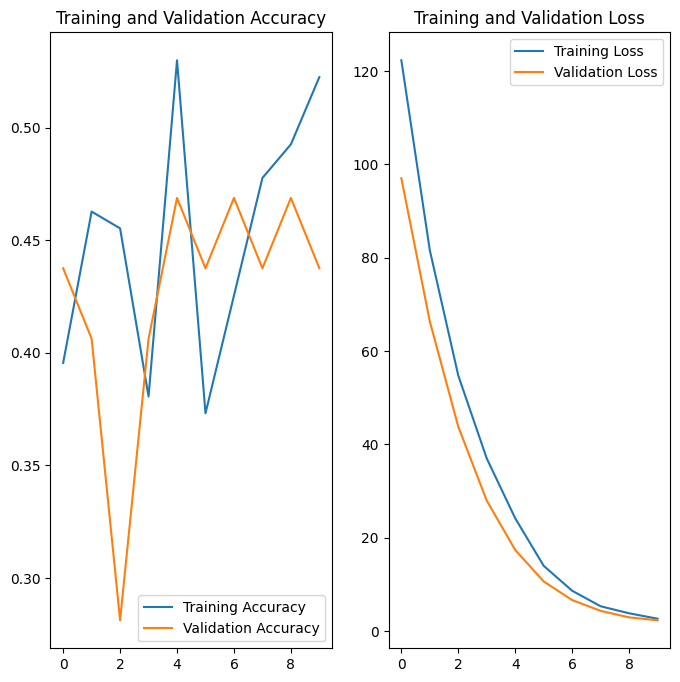

In [37]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by the model.fit() method
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Accuracy plot
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


1/1 [==============================] - 4s 4s/step


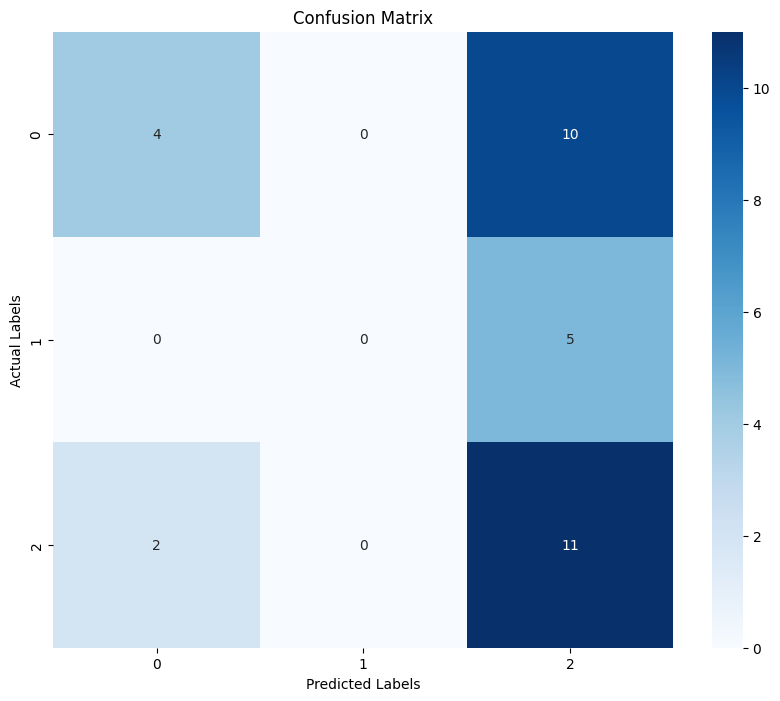

In [38]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns


predictions = model.predict(validation_generator, steps=np.ceil(validation_generator.samples/validation_generator.batch_size))
predicted_classes = np.argmax(predictions, axis=1)
true_classes = validation_generator.classes

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()


In [ ]:
model.save("resnet.h5")

In [41]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.regularizers import l2

# Load MobileNet as the base model, without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top for our specific task
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)  # Dropout layer for some regularization
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.1))(x)  # L2 regularization
predictions = Dense(3, activation='softmax')(x)  # Final prediction layer

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)


In [42]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history=model.fit(train_generator, validation_data=validation_generator, epochs=10)  # Adjust steps_per_epoch based on your dataset size


Epoch 1/10
5/5 [==============================] - 13s 2s/step - loss: 64.3657 - accuracy: 0.5522 - val_loss: 54.4029 - val_accuracy: 0.7188
Epoch 2/10
5/5 [==============================] - 12s 2s/step - loss: 48.8442 - accuracy: 0.6269 - val_loss: 42.0814 - val_accuracy: 0.7188
Epoch 3/10
5/5 [==============================] - 12s 2s/step - loss: 38.7064 - accuracy: 0.6269 - val_loss: 32.0012 - val_accuracy: 0.7812
Epoch 4/10
5/5 [==============================] - 12s 2s/step - loss: 29.0164 - accuracy: 0.7164 - val_loss: 24.0350 - val_accuracy: 0.6250
Epoch 5/10
5/5 [==============================] - 13s 3s/step - loss: 21.4676 - accuracy: 0.6493 - val_loss: 17.7383 - val_accuracy: 0.7500
Epoch 6/10
5/5 [==============================] - 12s 3s/step - loss: 15.4343 - accuracy: 0.6791 - val_loss: 12.9723 - val_accuracy: 0.7812
Epoch 7/10
5/5 [==============================] - 11s 2s/step - loss: 11.5966 - accuracy: 0.6642 - val_loss: 9.4888 - val_accuracy: 0.8438
Epoch 8/10
5/5 [=====

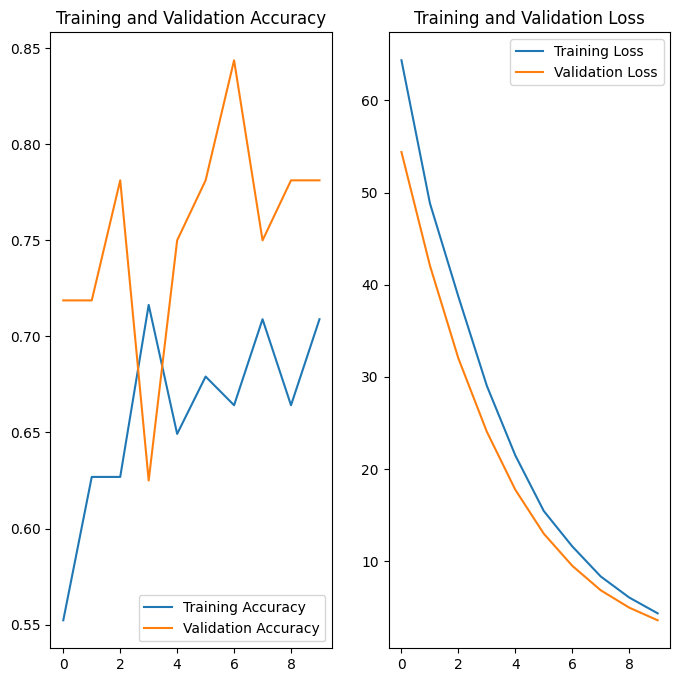

In [43]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by the model.fit() method
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Accuracy plot
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


1/1 [==============================] - 3s 3s/step


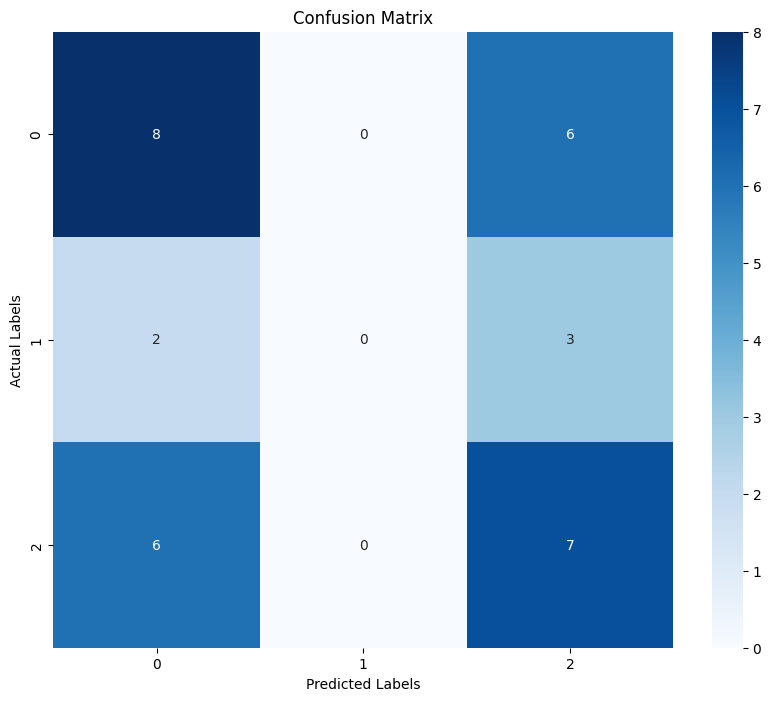

In [44]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns


predictions = model.predict(validation_generator, steps=np.ceil(validation_generator.samples/validation_generator.batch_size))
predicted_classes = np.argmax(predictions, axis=1)
true_classes = validation_generator.classes

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()


In [ ]:
model.save("vgg16.h5")

In [8]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
import numpy as np 

# Load the base model
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
model = Model(inputs=base_model.input, outputs=x)

def extract_features(generator, sample_count):
    # Assuming the model's output is 1024-dimensional features
    # Initialize arrays to hold the extracted features and labels.
    # Note: We use None for flexible sizing in the features' first dimension.
    features = np.zeros((0, 1024))  # Adjust 1024 if a different model output size is expected
    labels = np.zeros((0,))
    
    # Keep track of the number of samples processed
    processed_samples = 0
    
    for inputs_batch, labels_batch in generator:
        # Ensure not to process more than the sample_count
        if processed_samples < sample_count:
            # Predict features for the current batch of images
            features_batch = model.predict(inputs_batch)
            actual_batch_size = features_batch.shape[0]
            
            # Update the total number of processed samples
            processed_samples += actual_batch_size
            
            # Append the predicted features and the true labels to their respective arrays
            features = np.append(features, features_batch, axis=0)
            labels = np.append(labels, np.argmax(labels_batch, axis=1), axis=0)
            
            # If we've processed enough samples, break from the loop
            if processed_samples >= sample_count:
                break
        else:
            break
    
    # If we've processed more samples than needed, truncate the arrays
    if processed_samples > sample_count:
        features = features[:sample_count]
        labels = labels[:sample_count]
    
    return features, labels

train_features, train_labels = extract_features(train_generator, 200) # Adjust 200 to actual size
validation_features, validation_labels = extract_features(validation_generator, 50) # Adjust 50 to actual size


1/1 [==============================] - 0s 483ms/step


In [71]:
model.save("feature_extractor.h5")

C:\Users\0871\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create and train the Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(train_features, train_labels)

# Predict on the validation set
validation_predictions = rf.predict(validation_features)

# Evaluate the model
print("Validation Accuracy: ", accuracy_score(validation_labels, validation_predictions))
print("Classification Report:\n", classification_report(validation_labels, validation_predictions))


Validation Accuracy:  0.88
Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      1.00      0.90        23
         1.0       1.00      0.62      0.77         8
         2.0       0.94      0.84      0.89        19

    accuracy                           0.88        50
   macro avg       0.92      0.82      0.85        50
weighted avg       0.90      0.88      0.88        50



In [10]:
confusion_matrix(validation_labels, validation_predictions)

array([[23,  0,  0],
       [ 2,  5,  1],
       [ 3,  0, 16]], dtype=int64)

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import joblib


# It's often a good idea to scale features before using SVM
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
validation_features_scaled = scaler.transform(validation_features)

# Train the SVM model
svm_model = SVC(kernel='linear', C=1.0, decision_function_shape='ovo')
svm_model.fit(train_features_scaled, train_labels)

# Predict on the validation set
validation_predictions = svm_model.predict(validation_features_scaled)

# Evaluate the model
print("Validation Accuracy: ", accuracy_score(validation_labels, validation_predictions))
print("Classification Report:\n", classification_report(validation_labels, validation_predictions))


Validation Accuracy:  0.84
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        23
         1.0       0.55      0.75      0.63         8
         2.0       0.93      0.68      0.79        19

    accuracy                           0.84        50
   macro avg       0.80      0.81      0.79        50
weighted avg       0.86      0.84      0.84        50



In [12]:
joblib.dump(scaler, 'scaler.save')

['scaler.save']

In [13]:
confusion_matrix(validation_labels, validation_predictions)

array([[23,  0,  0],
       [ 1,  6,  1],
       [ 1,  5, 13]], dtype=int64)

In [76]:
import joblib
joblib.dump(svm_model, 'svm_model.pkl')

['svm_model.pkl']

In [69]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications.mobilenet import preprocess_input
import numpy as np

def load_and_preprocess_image(image_path):
    # Load the image file, resizing it to 224x224 pixels (as expected by MobileNet)
    img = load_img(image_path, target_size=(224, 224))
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    # Expand dimensions to match the shape expected by the pre-trained model: (1, 224, 224, 3)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    # Preprocess the image for the pre-trained model
    return preprocess_input(img_array_expanded)

image_path = r'TERMARIC LEAF DATA\Healthy\64.jpeg'
preprocessed_image = load_and_preprocess_image(image_path)

# Assuming 'model' is your pre-trained model for feature extraction
features = model.predict(preprocessed_image)
# Assuming 'scaler' is the StandardScaler instance you fitted on your training features
scaled_features = scaler.transform(features)
predicted_class = svm_model.predict(scaled_features)
print("Predicted class:", predicted_class)


1/1 [==============================] - 0s 37ms/step
Predicted class: [0.]


In [2]:
from tensorflow.keras.models import load_model
import joblib
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications.mobilenet import preprocess_input
import numpy as np
def load_and_preprocess_image(image_path):
    # Load the image file, resizing it to 224x224 pixels (as expected by MobileNet)
    img = load_img(image_path, target_size=(224, 224))
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    # Expand dimensions to match the shape expected by the pre-trained model: (1, 224, 224, 3)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    # Preprocess the image for the pre-trained model
    return preprocess_input(img_array_expanded)

# Load the feature extraction model
feature_extraction_model_path = 'feature_extractor.h5'
feature_extraction_model = load_model(feature_extraction_model_path)

# Load the scaler
scaler_path = 'scaler.save'
scaler = joblib.load(scaler_path)

# Load the SVM classifier
svm_classifier_path = 'svm_model.pkl'
svm_classifier = joblib.load(svm_classifier_path)

# Assuming you have a function to load and preprocess images named `load_and_preprocess_image`
preprocessed_image = load_and_preprocess_image(r'TERMARIC LEAF DATA\LEAF SPOT\3.jpeg')

# Extract features
features = feature_extraction_model.predict(preprocessed_image)

# Scale features
scaled_features = scaler.transform(features.reshape(1, -1))

# Predict with the SVM model
predicted_class = svm_classifier.predict(scaled_features)
print("Predicted class:", predicted_class)
if predicted_class==0:
    result="Healthy Leaf"
    print(result)
elif predicted_class==1:
    result="Spot Leaf" 
    print(result)
else:
    result="Blotch Leaf"
    print(result)

1/1 [==============================] - 0s 411ms/step
Predicted class: [1.]
Spot Leaf
